In [2]:
import pandas as pd
#On charge le dataset
df = pd.read_csv("GolfData.csv")
df.head()

,N° Jour,Pif,Temp,Humid,Vent,Golf
0,1,soleil,chaud,haute,faux,NePasJouer
1,2,soleil,chaud,haute,vrai,NePasJouer
2,3,couvert,chaud,haute,faux,Jouer
3,4,pluie,bon,haute,faux,Jouer
4,5,pluie,frais,normale,faux,Jouer


In [3]:
#supprimer la colonne Golf
inputs = df.drop('Golf',axis='columns')

target = df['Golf']


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#créer des objects des la classe LabelEncoder
le_Pif = LabelEncoder()
le_Temp = LabelEncoder()
le_Humid = LabelEncoder()
le_Vent = LabelEncoder()


In [6]:
#creé des nouvaux colonnes avec des valeur quantitative 
inputs['Pif_n'] = le_Pif.fit_transform(inputs['Pif'])
inputs['Temp_n'] = le_Temp.fit_transform(inputs['Temp'])
inputs['Humid_n'] = le_Humid.fit_transform(inputs['Humid'])
inputs['Vent_n'] = le_Vent.fit_transform(inputs['Vent'])
#drop les colonnes qui conteint les varleur qualitative 
inputs_n = inputs.drop(['N° Jour' ,'Pif' , 'Temp' , 'Humid' , 'Vent'] , axis='columns')
inputs_n

,Pif_n,Temp_n,Humid_n,Vent_n
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,0,0,0
4,1,2,1,0
5,1,2,1,1
6,0,2,1,1
7,2,0,0,0
8,2,2,1,0
9,1,0,1,0


In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(inputs_n, target)

C:\Users\Yassine\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

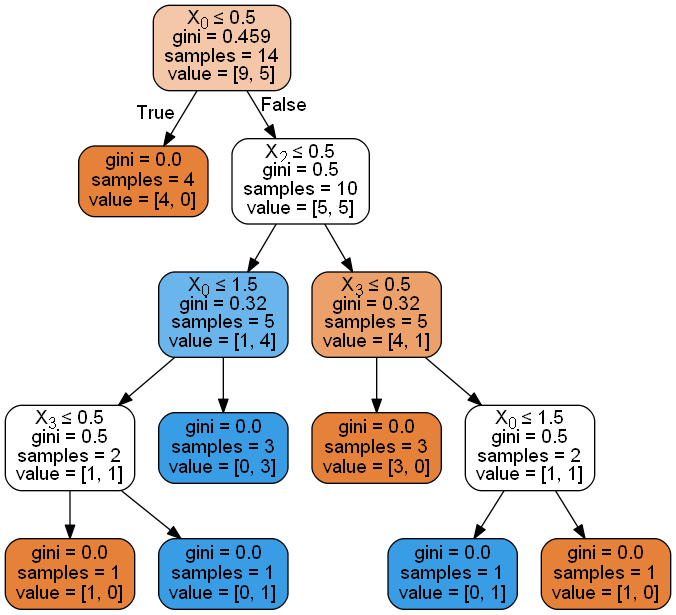

In [9]:
# from sklearn.externals.six import StringIO  
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,                
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
clf.predict([[2,0,0,0]])

array(['NePasJouer'], dtype=object)